# 6. Hafta Lab-1: Doğrusal SVM Karar Sınırları
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak
Bu lab çalışmasında doğrusal ayrıştırılabilir bir veri kümesinin SVM karar sınırlarını belirleyeceğiz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

100 adet ayrıştırılabilir veri örneği oluşturalım. İlk 50 örnek $0$ sınıf etiketine, diğer 50 örnek $+1$ sınıf etiketine sahip olsun.

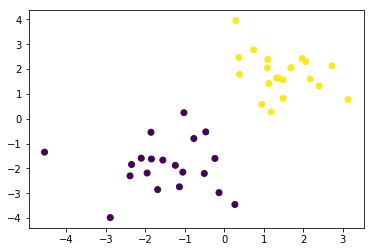

In [2]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20
plt.scatter(X[:,0], X[:,1],c=y)

Doğrusal SVM oluşturup eğitelim.

In [3]:
# fit the model
clf = svm.SVC(kernel='linear', verbose=True)
clf.fit(X, y)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

Doğrusal ayrıştıran hiper düzlem

In [4]:
w = clf.coef_[0] # b değeri
a = -w[0] / w[1] # egim
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

Paralel hiperdüzlemleri bulalım.

In [5]:
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

3 hiperdüzlemi çizelim

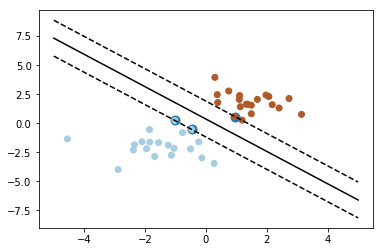

In [7]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()
